In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [2]:
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = "gray"
plt.rcParams['axes.unicode_minus'] = False

# 3.비지도 학습과 데이터 전처리

## 비지도 학습의 종류

## 3.3 데이터 전처리와 스케일링

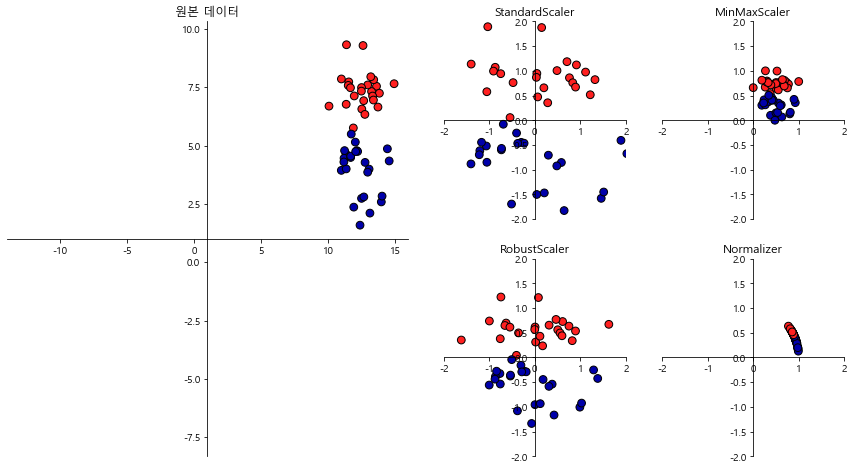

In [3]:
mglearn.plots.plot_scaling()

# Scaling

## 스케일링을 왜 해야 할까요?
변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 Target에 미치는 영향력이 제대로 표현되지 않을수 있습니다.<br>
Sklearn의 대표적인 스케일링 함수로는 특정 변수의 최대, 최소 값으로 조절하는 Min_max스케일링과 z-정규화를 이용한 Standard스케일링이 있습니다.


## 1. Min-Max Scaling
- Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경됩니다. <br> 

$$ x - Min(X) \over Max(X) - Min(X) $$<br>
$$X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$

Sklearn에서 Min_Max Scaler는 preprocessing 패키지에 있습니다.

### 3.3.2 데이터 변환 적용하기

### 유방암 데이터 적재하여 테스트/훈련세트로 나누기

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [8]:
import pandas as pd
y_label = cancer.target
cancer_df = pd.DataFrame(data=cancer.data,
                        columns=cancer.feature_names)
cancer_df['target'] = y_label
cancer_df.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1


#### df.describe()함수는 각 변수별 평균, 표준편차, 최대, 최소, 사분위수 등의 기초 통계량을 확인 할수 있습니다.

In [9]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
print('feature들의 최소 값')
print(cancer_df.min())
print('\nfeature들의 최대 값')
print(cancer_df.max())

feature들의 최소 값
mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.0272

* 어떤 feature의 값은 너무 작고 어떤 feature의 값은 너무 크다 그래서 전처리를 해야한다.

### MinMaxScaler를 이용하여 전처리 후 속성값 확인하기

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
#MinMaxScaler의 fit메서드는 훈련 세트에 있는 특성마다 최대/최소값을 계산
scaler.fit(X_train)

MinMaxScaler()

In [17]:
# fit 메서드로 학습한 변환을 적용하려면 스케일 객체의 transform 메서드를 사용 데이텉 변환
X_train_scaled = scaler.transform(X_train)

print("변화된 후 크기:",X_train_scaled.shape)

print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))

print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변화된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [19]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = cancer.feature_names)
X_train_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.389938,0.707136,0.411927,0.243224,0.470976,0.708215,0.597470,0.468638,0.539394,0.467590,...,0.341160,0.820096,0.389910,0.179365,0.465760,0.839448,1.000000,0.809622,0.599572,0.917550
1,0.377633,0.317552,0.367908,0.230668,0.336643,0.294965,0.139175,0.239513,0.413636,0.181938,...,0.295980,0.377665,0.292295,0.153510,0.397081,0.302775,0.154188,0.511684,0.331749,0.315987
2,0.364381,0.352384,0.352083,0.229480,0.415636,0.196843,0.173266,0.261382,0.265657,0.197319,...,0.396300,0.502665,0.363514,0.234172,0.496797,0.175498,0.249060,0.552921,0.347671,0.288575
3,0.158029,0.224552,0.148711,0.076946,0.376546,0.114320,0.023711,0.027311,0.416667,0.258624,...,0.118107,0.259861,0.103143,0.049081,0.378591,0.067131,0.037470,0.081821,0.264971,0.201092
4,0.230442,0.262090,0.219404,0.122672,0.280672,0.138561,0.062980,0.113320,0.411616,0.151835,...,0.182497,0.365938,0.169032,0.081744,0.434062,0.163088,0.112479,0.314089,0.364781,0.159118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.606228,0.521136,0.598507,0.444751,0.441184,0.521921,0.596298,0.571074,0.576768,0.239288,...,0.522946,0.574627,0.489516,0.345016,0.371987,0.394033,0.484872,0.595189,0.413260,0.315237
422,0.178380,0.177883,0.169097,0.089841,0.228401,0.119744,0.052741,0.039140,0.171212,0.145902,...,0.143010,0.231876,0.136361,0.062918,0.240573,0.104337,0.083376,0.117285,0.174430,0.133633
423,0.483648,0.500845,0.486559,0.333362,0.491740,0.612075,0.396439,0.394831,0.437879,0.321468,...,0.547492,0.581023,0.503959,0.367627,0.576702,0.782014,0.561197,0.652577,0.415162,0.842596
424,0.333617,0.390260,0.317877,0.195080,0.343685,0.187304,0.034255,0.094235,0.230808,0.178203,...,0.263252,0.486674,0.238358,0.130333,0.379912,0.136183,0.053256,0.273643,0.156844,0.224435


In [20]:
X_train_scaled.min()

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
dtype: float64

In [21]:
X_train_scaled.max()

mean radius                1.0
mean texture               1.0
mean perimeter             1.0
mean area                  1.0
mean smoothness            1.0
mean compactness           1.0
mean concavity             1.0
mean concave points        1.0
mean symmetry              1.0
mean fractal dimension     1.0
radius error               1.0
texture error              1.0
perimeter error            1.0
area error                 1.0
smoothness error           1.0
compactness error          1.0
concavity error            1.0
concave points error       1.0
symmetry error             1.0
fractal dimension error    1.0
worst radius               1.0
worst texture              1.0
worst perimeter            1.0
worst area                 1.0
worst smoothness           1.0
worst compactness          1.0
worst concavity            1.0
worst concave points       1.0
worst symmetry             1.0
worst fractal dimension    1.0
dtype: float64

In [22]:
X_train_scled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.337853,0.325399,0.332634,0.217445,0.395715,0.318702,0.207408,0.242699,0.377479,0.276264,...,0.297817,0.363895,0.284270,0.173015,0.403200,0.250337,0.230825,0.393897,0.311575,0.306637
std,0.170548,0.147265,0.171662,0.153378,0.124705,0.190771,0.186537,0.194390,0.137147,0.149148,...,0.177544,0.167271,0.172366,0.145758,0.146829,0.169590,0.174366,0.229256,0.137195,0.180630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.220148,0.219056,0.213375,0.114157,0.307755,0.173706,0.067045,0.098347,0.282828,0.172984,...,0.175293,0.240338,0.163056,0.078954,0.306941,0.132065,0.093120,0.221108,0.222077,0.179355
50%,0.298121,0.307744,0.292447,0.169905,0.395369,0.289578,0.143861,0.167495,0.370707,0.252692,...,0.245998,0.350880,0.232731,0.121018,0.399062,0.209541,0.196581,0.339708,0.295865,0.267695
75%,0.418927,0.409452,0.416246,0.272980,0.476167,0.415588,0.309396,0.367942,0.447348,0.347946,...,0.383404,0.474747,0.371732,0.216231,0.486892,0.345164,0.326838,0.569674,0.377020,0.394502
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* MinMaxScaler이므로 최대와 최댓값이 0,1로 변환
* 데이터의 배열 크기는 원래 데이터와 동일, 각 속성의 값이 0~1으로 변형되었다.

#### 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기(테스트 데이터를)

In [24]:
X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값: \n{}", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값: \n{}", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값: 
{} [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값: 
{} [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [25]:
#테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다.
print("스케일 조정 후 특성별 최소값: \n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값: \n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값: 
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값: 
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


#### 데이터 변환 적용하기
* MinMaxScaler로 스케일을 조정한 테스트 세트의 최대/최소값은 1과 0이 아니며 일부 특성은 0~1범위를 넘어가는데 크게 문제되진 않는다.

### 한꺼번에 정리해서 그래프그리기

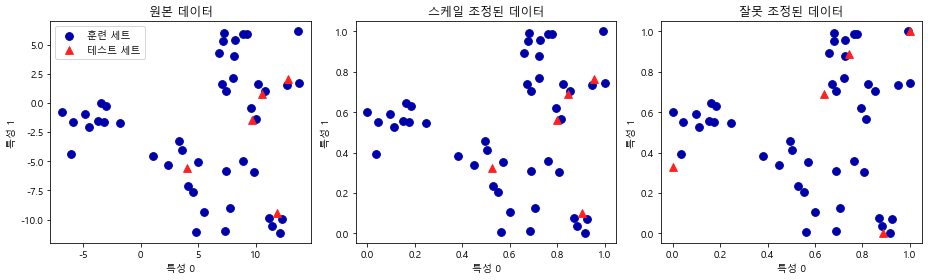

In [27]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()


### 유방암 데이터 셋 : 데이터 전처리를 하기전의 성능(전후 성능비교)

In [30]:
from sklearn.svm import SVC

#훈련/테스트 세트 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

svm = SVC(gamma='auto')
svm.fit(X_train,y_train)

print('훈련 세트 정확도 : {:.2f}'.format(svm.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.2f}'.format(svm.score(X_test, y_test)))

훈련 세트 정확도 : 1.00
테스트 세트 정확도 : 0.63


### 데이터 전처리 성능 측정 - MinMaxScaler 사용(유방암)

In [37]:
#0~1사이로 스케일링 조정
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

#조정된 데이터로 SVM학습
svm.fit(X_train_scaled, y_train)
print('스케일 조정된 훈련 세트 정확도 : {:.2f}'.format(svm.score(X_train_scaled,y_train)))
print('스케일 조정된 테스트 세트 정확도 : {:.2f}'.format(svm.score(X_test_scaled,y_test)))

스케일 조정된 훈련 세트 정확도 : 0.95
스케일 조정된 테스트 세트 정확도 : 0.95


### 스케이링 전 후 성능비교 한꺼번에 보기

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
svm = SVC(gamma='auto')

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)


# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled,y_train)
print("스케일 조정된 훈련 세트 정확도 : {:.2f}".format(svm.score(X_train_scaled,y_train)))
print("스케일 조정된 테스트 세트 정확도 : {:.2f}".format(svm.score(X_test_scaled,y_test)))


스케일 조정된 훈련 세트 정확도 : 0.95
스케일 조정된 테스트 세트 정확도 : 0.95


## 2. Standatrd Scaling
z-score 라고 하는 데이터를 통계적으로 표준정규분포화 시켜 스케일링을 하는 방식입니다.<br>
데이터의 평균이 0, 표준 편차가 1이 되도록 스케일링 합니다.

$$ z = {{x - \mu} \over {\sigma}} $$
$$ \mu : 데이터의\ 평균, Mean(X) $$
$$ \sigma : 데이터의\ 표준편차, Std(X)$$
$$ X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$<br>
Sklearn에서 Standard Scaler는 preprocessing 패키지에 있습니다.

### 데이터 전처리 성능 측정 - StandatdScaler 사용(유방암)

In [42]:
print('feature 들의 평균 값')
print(cancer_df.mean())
print('\nfeature 들의 분산 값')
print(cancer_df.var())

feature 들의 평균 값
mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254

In [45]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_scaled_standard = standard_scaler.transform(X_train)
X_test_scaled_standard = standard_scaler.transform(X_test)

#조정된 데이터로 SVM학습
svm.fit(X_train_scaled_standard, y_train)
print("스케일 조정된 훈련 세트 정확도 : {:.2f}".
      format(svm.score(X_train_scaled_standard,y_train)))
print("스케일 조정된 테스트 세트 정확도 : {:.2f}".
      format(svm.score(X_test_scaled_standard,y_test)))

스케일 조정된 훈련 세트 정확도 : 0.99
스케일 조정된 테스트 세트 정확도 : 0.97


#### 모든 전처리 모델이 fit, transform메서드를 제공 손쉽게 교체할 수 있다